In [32]:
# Import modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

from sklearn.metrics import r2_score

In [2]:
# Load the dataset
df = pd.read_csv("/content/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# check info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
# Check for null values
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [5]:
# Droping null values
df = df.dropna()
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [6]:
# check info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8084 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               8084 non-null   object 
 1   Model              8084 non-null   object 
 2   Year               8084 non-null   int64  
 3   Engine Fuel Type   8084 non-null   object 
 4   Engine HP          8084 non-null   float64
 5   Engine Cylinders   8084 non-null   float64
 6   Transmission Type  8084 non-null   object 
 7   Driven_Wheels      8084 non-null   object 
 8   Number of Doors    8084 non-null   float64
 9   Market Category    8084 non-null   object 
 10  Vehicle Size       8084 non-null   object 
 11  Vehicle Style      8084 non-null   object 
 12  highway MPG        8084 non-null   int64  
 13  city mpg           8084 non-null   int64  
 14  Popularity         8084 non-null   int64  
 15  MSRP               8084 non-null   int64  
dtypes: float64(3), int64(5)

In [13]:
# Label Encoding
le = LabelEncoder()
for i in df.select_dtypes(include=["object"]).columns:
  df[i] = le.fit_transform(df[i])

In [14]:
# Check dataset again
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,2011,6,335.0,6.0,3,3,2.0,37,0,8,26,19,3916,46135
1,4,0,2011,6,300.0,6.0,3,3,2.0,66,0,6,28,19,3916,40650
2,4,0,2011,6,300.0,6.0,3,3,2.0,63,0,8,28,20,3916,36350
3,4,0,2011,6,230.0,6.0,3,3,2.0,66,0,8,28,18,3916,29450
4,4,0,2011,6,230.0,6.0,3,3,2.0,62,0,6,28,18,3916,34500


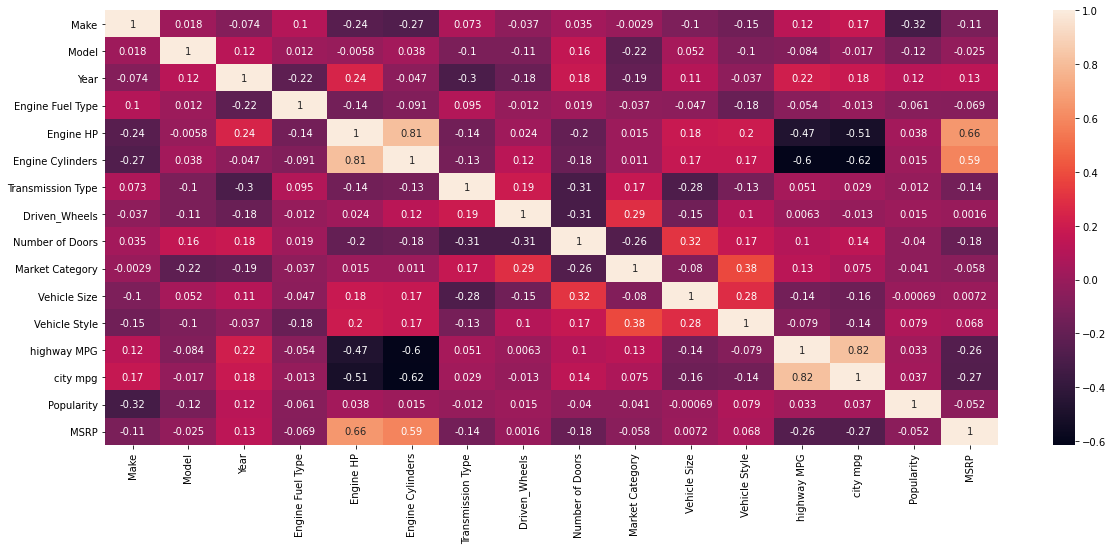

In [18]:
# Check corelation 
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [20]:
# Split data into features and target
feature = list(df.columns)
target = 'MSRP'

In [26]:
# Train test split
X = df[feature]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Create model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_train, y_train)

1.0

In [38]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.995640422395049

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0739448 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0739448 to fit



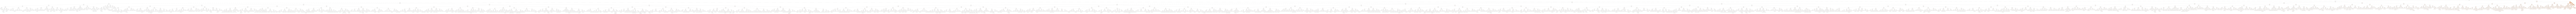

In [37]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(decision_tree = model, out_file = dot_data, filled = True, rounded = True,
                feature_names = feature
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())